In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.5809

Best Fitness:	602.1682
Solution:	600.0000
Diff:		2.1682

[0:04:01][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.9010

Best Fitness:	603.2286
Solution:	600.0000
Diff:		3.2286

[0:07:13][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	606.3021

Best Fitness:	603.7601
Solution:	600.0000
Diff:		3.7601

[0:10:21][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.3702

Best Fitness:	602.7264
Solution:	600.0000
Diff:		2.7264

[0:13:23][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.1623

Best Fitness:	602.4017
Solution:	600.0000
Diff:		2.4017

[0:16:38][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	602.9118

Best Fitness:	601.8575
Solution:	600.0000
Diff:		1.8575

[0:19:51][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.8036

Best Fitness:	601.7030
Solution:	600.0000
Diff:		1.7030

[0:22:57][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.3307

Best Fitness:	602.5386
Solution:	600.0000
Diff:		2.5386

[0:26:15][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.4677

Best Fitness:	602.6935
Solution:	600.0000
Diff:		2.6935

[0:29:23][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.6269

Best Fitness:	603.4180
Solution:	600.0000
Diff:		3.4180

[0:32:50][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.6171

Best Fitness:	603.4975
Solution:	600.0000
Diff:		3.4975

[0:36:11][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.7244

Best Fitness:	603.3310
Solution:	600.0000
Diff:		3.3310

[0:39:32][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.5478

Best Fitness:	603.1832
Solution:	600.0000
Diff:		3.1832

[0:42:15][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.2705

Best Fitness:	603.3188
Solution:	600.0000
Diff:		3.3188

[0:45:12][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.4707

Best Fitness:	602.3846
Solution:	600.0000
Diff:		2.3846

[0:47:59][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.2169

Best Fitness:	602.9330
Solution:	600.0000
Diff:		2.9330

[0:50:47][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.5937

Best Fitness:	603.2017
Solution:	600.0000
Diff:		3.2017

[0:53:17][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.3362

Best Fitness:	602.0688
Solution:	600.0000
Diff:		2.0688

[0:55:51][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.2995

Best Fitness:	602.7775
Solution:	600.0000
Diff:		2.7775

[0:58:36][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.5437

Best Fitness:	602.3818
Solution:	600.0000
Diff:		2.3818

[1:01:18][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.2199

Best Fitness:	603.2599
Solution:	600.0000
Diff:		3.2599

[1:04:13][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.1652

Best Fitness:	602.2788
Solution:	600.0000
Diff:		2.2788

[1:06:48][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	609.4434

Best Fitness:	605.8505
Solution:	600.0000
Diff:		5.8505

[1:09:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.6362

Best Fitness:	602.9621
Solution:	600.0000
Diff:		2.9621

[1:12:39][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.7334

Best Fitness:	603.0009
Solution:	600.0000
Diff:		3.0009

[1:15:20][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.7454

Best Fitness:	602.3611
Solution:	600.0000
Diff:		2.3611

[1:18:09][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.3745

Best Fitness:	602.2279
Solution:	600.0000
Diff:		2.2279

[1:20:59][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.1284

Best Fitness:	602.5836
Solution:	600.0000
Diff:		2.5836

[1:23:46][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.5106

Best Fitness:	603.1434
Solution:	600.0000
Diff:		3.1434

[1:26:31][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.3414

Best Fitness:	602.5951
Solution:	600.0000
Diff:		2.5951

[1:29:33][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.3554

Best Fitness:	602.2848
Solution:	600.0000
Diff:		2.2848

[1:32:20][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	607.6324

Best Fitness:	605.2833
Solution:	600.0000
Diff:		5.2833

[1:34:57][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.3981

Best Fitness:	603.3306
Solution:	600.0000
Diff:		3.3306

[1:37:24][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	608.1355

Best Fitness:	605.1890
Solution:	600.0000
Diff:		5.1890

[1:39:59][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.1685

Best Fitness:	603.3227
Solution:	600.0000
Diff:		3.3227

[1:42:34][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.0444

Best Fitness:	602.1739
Solution:	600.0000
Diff:		2.1739

[1:44:59][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.1293

Best Fitness:	602.4196
Solution:	600.0000
Diff:		2.4196

[1:47:36][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	602.9495

Best Fitness:	601.7751
Solution:	600.0000
Diff:		1.7751

[1:50:04][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.3389

Best Fitness:	602.6605
Solution:	600.0000
Diff:		2.6605

[1:52:31][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.9631

Best Fitness:	602.3378
Solution:	600.0000
Diff:		2.3378

[1:54:59][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.7923

Best Fitness:	603.0829
Solution:	600.0000
Diff:		3.0829

[1:57:37][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.9121

Best Fitness:	602.6959
Solution:	600.0000
Diff:		2.6959

[2:00:04][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.2012

Best Fitness:	601.9638
Solution:	600.0000
Diff:		1.9638

[2:02:26][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.2875

Best Fitness:	602.0105
Solution:	600.0000
Diff:		2.0105

[2:04:56][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.4670

Best Fitness:	602.0241
Solution:	600.0000
Diff:		2.0241

[2:07:20][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	602.6567

Best Fitness:	601.5219
Solution:	600.0000
Diff:		1.5219

[2:09:51][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.1119

Best Fitness:	601.8113
Solution:	600.0000
Diff:		1.8113

[2:12:16][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	603.0889

Best Fitness:	602.0561
Solution:	600.0000
Diff:		2.0561

[2:14:28][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.0103

Best Fitness:	602.6460
Solution:	600.0000
Diff:		2.6460

[2:17:04][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	604.0075

Best Fitness:	602.8868
Solution:	600.0000
Diff:		2.8868

[2:19:32][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	605.0210

Best Fitness:	603.3223
Solution:	600.0000
Diff:		3.3223

[2:22:04][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:22:04

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,3.322317,4.908825,6.42493,6.872600,5.452153,6.066362,6.332632,5.457722,5.017306,6.160465,...,5.762392,5.084856,4.928133,5.841006,5.094051,5.682778,4.868191,7.116874,5.916343,50
94,3.322317,4.908825,6.42493,6.697726,5.452153,6.066362,6.021779,5.457722,5.017306,4.635442,...,5.350287,5.084856,4.928133,5.841006,5.094051,5.682778,4.868191,6.376445,5.916343,50
95,3.322317,4.908825,5.86818,6.697726,5.452153,6.066362,6.021779,5.457722,5.017306,4.635442,...,5.350287,5.084856,4.928133,5.841006,5.094051,5.519400,4.868191,5.316007,5.916343,50
96,3.322317,4.908825,5.86818,6.697726,5.452153,6.066362,6.021779,5.457722,5.017306,4.635442,...,5.350287,5.084856,4.928133,5.841006,5.094051,5.519400,4.868191,4.474641,5.916343,50
97,3.322317,4.908825,5.86818,6.697726,4.470356,6.066362,6.021779,5.457722,5.017306,4.635442,...,5.350287,5.084856,4.928133,5.841006,5.094051,5.519400,4.868191,4.474641,5.544248,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 2.1681524816473257

Best error for run 1: 3.2285893494026823

Best error for run 2: 3.760133214265352

Best error for run 3: 2.726351312023212

Best error for run 4: 2.4017278233658317

Best error for run 5: 1.8574663126618134

Best error for run 6: 1.7029983078840587

Best error for run 7: 2.5386170743194043

Best error for run 8: 2.6934956989560987

Best error for run 9: 3.418020192050335

Best error for run 10: 3.497455672647334

Best error for run 11: 3.330956407791973

Best error for run 12: 3.183169573291707

Best error for run 13: 3.3187798509169397

Best error for run 14: 2.3846249222889355

Best error for run 15: 2.9330095341653077

Best error for run 16: 3.201658222546939

Best error for run 17: 2.068842891170789

Best error for run 18: 2.777465553489037

Best error for run 19: 2.3817940217792284

Best error for run 20: 3.259906973049965

Best error for run 21: 2.278836652147106

Best error for run 22: 5.8505407693700135

Best error for run 23: 2.9620688860673

Best error for run 24: 3.0008961618893863

Best error for run 25: 2.3611188318012637

Best error for run 26: 2.2279422364684933

Best error for run 27: 2.583563156160494

Best error for run 28: 3.143432642060475

Best error for run 29: 2.5951239601324687

Best error for run 30: 2.2847590575809136

Best error for run 31: 5.2833396083786965

Best error for run 32: 3.3305804571930366

Best error for run 33: 5.188985744472916

Best error for run 34: 3.3226823881445853

Best error for run 35: 2.1738874646342765

Best error for run 36: 2.419558550670672

Best error for run 37: 1.7750657403606738

Best error for run 38: 2.6605496678546388

Best error for run 39: 2.3378407526231513

Best error for run 40: 3.0829265532502177

Best error for run 41: 2.695904914791754

Best error for run 42: 1.9637924691260196

Best error for run 43: 2.010482695185601

Best error for run 44: 2.024125611564841

Best error for run 45: 1.5218547952387098

Best error for run 46: 1.8113254429123344

Best error for run 47: 2.056138491010188

Best error for run 48: 2.64595948299052

Best error for run 49: 2.8867520423494852

Best error for run 50: 3.322317479186495

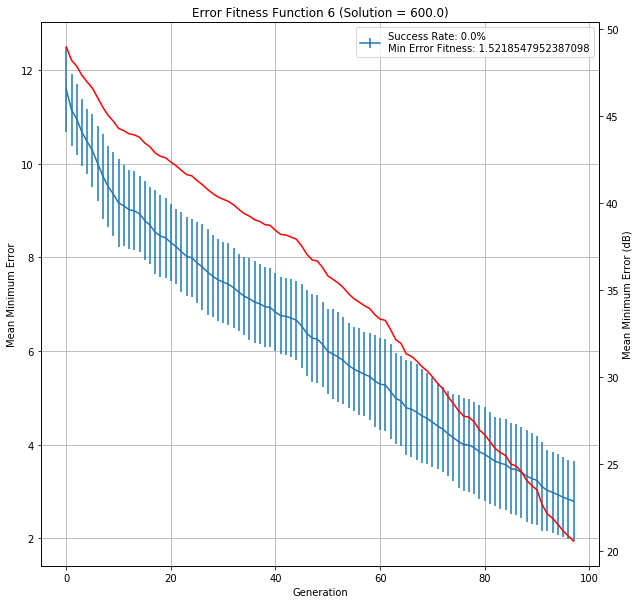

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.3,2.168152,3.228589,3.760133,2.726351,2.401728,1.857466,...,2.024126,1.521855,1.811325,2.056138,2.645959,2.886752,3.322317,2.796776,2:22:04,30000
